In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Input,Conv1D,MaxPooling1D,Dropout
#from keras.optimizers import Adam

dosya_yolu_1 = "left"
dosya_yolu_2 = "right"
dosya_yolu_3 = "up"
dosya_yolu_4 = "down"

n_mfcc = 13
hop_length = 512
n_fft = 2048

mfcc_features_left = []
mfcc_features_right = []
mfcc_features_up = []
mfcc_features_down = []

for dosya_adı in os.listdir(dosya_yolu_1):
    if dosya_adı.endswith(".wav"):
        dosya_path = os.path.join(dosya_yolu_1, dosya_adı)
        ses_sinyali, fs = librosa.load(dosya_path)
        mfcc = librosa.feature.mfcc(y=ses_sinyali, sr=fs, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
        if len(mfcc[0]) == 44:
            mfcc_features_left.append(mfcc.T)
        #print(mfcc.shape)
        
for dosya_adı in os.listdir(dosya_yolu_2):
    if dosya_adı.endswith(".wav"):
        dosya_path = os.path.join(dosya_yolu_2, dosya_adı)
        ses_sinyali, fs = librosa.load(dosya_path)
        mfcc = librosa.feature.mfcc(y=ses_sinyali, sr=fs, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
        if len(mfcc[0]) == 44:
            mfcc_features_right.append(mfcc.T)
        #print(mfcc.shape)

for dosya_adı in os.listdir(dosya_yolu_3):
    if dosya_adı.endswith(".wav"):
        dosya_path = os.path.join(dosya_yolu_3, dosya_adı)
        ses_sinyali, fs = librosa.load(dosya_path)
        mfcc = librosa.feature.mfcc(y=ses_sinyali, sr=fs, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
        if len(mfcc[0]) == 44:
            mfcc_features_up.append(mfcc.T)
        #print(mfcc.shape)
        
for dosya_adı in os.listdir(dosya_yolu_4):
    if dosya_adı.endswith(".wav"):
        dosya_path = os.path.join(dosya_yolu_4, dosya_adı)
        ses_sinyali, fs = librosa.load(dosya_path)
        mfcc = librosa.feature.mfcc(y=ses_sinyali, sr=fs, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
        if len(mfcc[0]) == 44:
            mfcc_features_down.append(mfcc.T)
        #print(mfcc.shape)
        
        
size_left = np.array(mfcc_features_left)
size_right = np.array(mfcc_features_right)
size_up = np.array(mfcc_features_up)
size_down = np.array(mfcc_features_down)
print(size_down)
x_train = np.array(np.concatenate((mfcc_features_left,mfcc_features_right,mfcc_features_up,mfcc_features_down), axis=0))
y_train = np.array([0] * len(size_left) + [1] *len(size_right) + [2] * len(size_up) + [3]*len(size_down))
y_train = tf.keras.utils.to_categorical(y_train)

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(44, n_mfcc)))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))

model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))

model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

opt = keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split = 0.1)
model.save("my_voice_big_model_1000_4_command.h5")


In [1]:
import numpy as np
import librosa
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Input
from keras.models import load_model

model = load_model('my_voice_big_model_4_command_3.h5')

n_mfcc = 13
hop_length = 512
n_fft = 2048
mfcc_feature = []
ses_sinyali, fs = librosa.load('down_n.wav')
mfcc = librosa.feature.mfcc(y=ses_sinyali, sr=fs, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
mfcc_feature.append(mfcc.T)
mfcc_feature = np.array(mfcc_feature)
predictions = model.predict(mfcc_feature[:,-44:,:])

print(predictions)

[[1.6388165e-05 2.4314329e-07 5.3520493e-05 9.9992979e-01]]


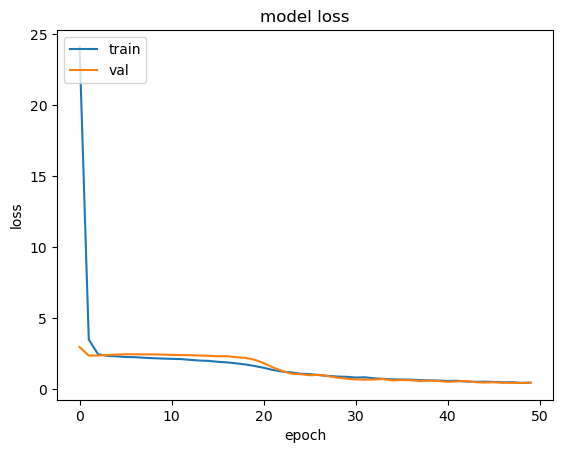

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()